In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import datetime
import random
from urllib.parse import urlparse

pages = set()
random.seed(datetime.datetime.now())

#Retrieves a list of all Internal links found on a page
def getInternalLinks(bs, includeUrl):
    includeUrl = '{}://{}'.format(urlparse(includeUrl).scheme, urlparse(includeUrl).netloc)
    internalLinks = []
    #Finds all links that begin with a "/"
    for link in bs.find_all('a', href=re.compile('^(/|.*'+includeUrl+')')):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in internalLinks:
                if(link.attrs['href'].startswith('/')):
                    internalLinks.append(includeUrl+link.attrs['href'])
                else:
                    internalLinks.append(link.attrs['href'])
    return internalLinks
            
#Retrieves a list of all external links found on a page
def getExternalLinks(bs, excludeUrl):
    externalLinks = []
    #Finds all links that start with "http" that do
    #not contain the current URL
    for link in bs.find_all('a', href=re.compile('^(http|www)((?!'+excludeUrl+').)*$')):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in externalLinks:
                externalLinks.append(link.attrs['href'])
    return externalLinks

In [ ]:
#  사이트에서 찾은 외부 URL을 모두 리스트로 수집
allExtLinks = set()
allIntLinks = set()

def getAllExternalLinks(siteUrl):
    html = urlopen(siteUrl)
    domain = '{}://{}'.format(urlparse(siteUrl).scheme,
                             urlparse(siteUrl).netloc)
    bs = BeautifulSoup(html, 'html.parser')
    internalLinks = getInternalLinks(bs, domain)
    externalLinks = getExternalLinks(bs, domain)
    
    for link in externalLinks:
        if link not in allExtLinks:
            allExtLinks.add(link)
            prink(link)
    for link in internalLinks:
        if link not in allIntLinks:
            allIntLinks.add(link)
            getAllExternalLInks(link)

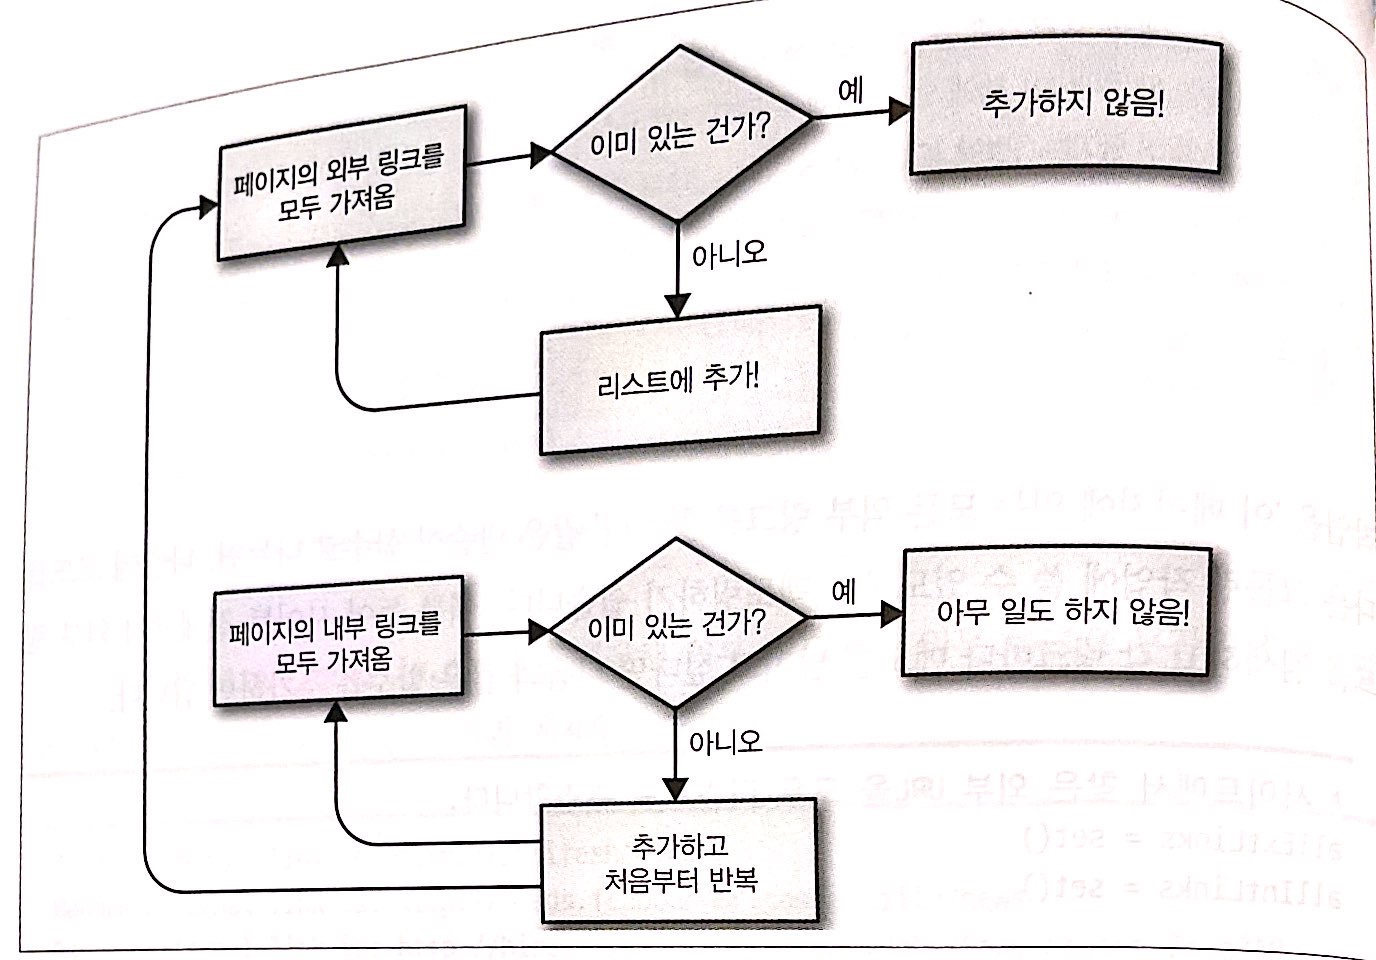

In [6]:
from IPython.display import Image 

# 순서도
Image("KakaoTalk_20210301_162539296.jpg")